# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

# <font color='blue'>Практическое задание</font>

1. Постройте нейронную сеть (берём простую линейную сеть, которую разбирали на уроке: меняем число слоёв, число нейронов, типы активации, тип оптимизатора) на датасете from sklern.datasets import load_boston.<br>

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшите её точность?

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

1-2.(*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imb_rewiews. Опишите, какого результата вы добились от нейросети? Что помогло вамулучшить её точность?


# Boston House Prices

The Boston Housing Dataset - https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data<br>
https://www.machinelearningmastery.ru/linear-regression-on-boston-housing-dataset-f409b7e4a155/

Data: housing.csv(49.08 kB) - Boston House Price dataset

0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \$10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: \% lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's<br>


- CRIM: - уровень преступности на душу населения по городам
- ZN: - доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. футов.
- INDUS: - доля акров, не относящихся к розничной торговле, на город
- CHAS: - фиктивная переменная Charles River (= 1, если участок ограничивает реку; 0 в противном случае)
- NOX: - концентрация оксидов азота (частей на 10 миллионов)
- RM: - среднее количество комнат в доме в РМ
- AGE: - доля единиц, занимаемых владельцами, построенных до 1940 г.
- DIS: - взвешенные расстояния до пяти бостонских центров занятости
- RAD: - индекс доступности радиальных автомобильных дорог
- TAX: - ставка налога на имущество в размере полной стоимости из расчета 10 000 долларов США.
- PTRATIO: - cСоотношение учеников и учителей по городам 
- B: 1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам
- LSTAT: - % более низкий статус населения
- MEDV: - средняя стоимость домов, занимаемых владельцами, в 1000 долларов США.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import r2_score

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad  # Оптимизаторы

In [ ]:
print(tf.__version__)

2.9.0-dev20211226


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston_dataset = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [ ]:
print(boston_dataset.keys())

# data: содержит информацию для различных домов
# target: цены на дом
# feature_names: названия функций
# DESCR: описывает набор данных

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(boston.shape)
boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
target = boston_dataset["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

# Предварительная обработка данных

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Исследовательский анализ данных

In [ ]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


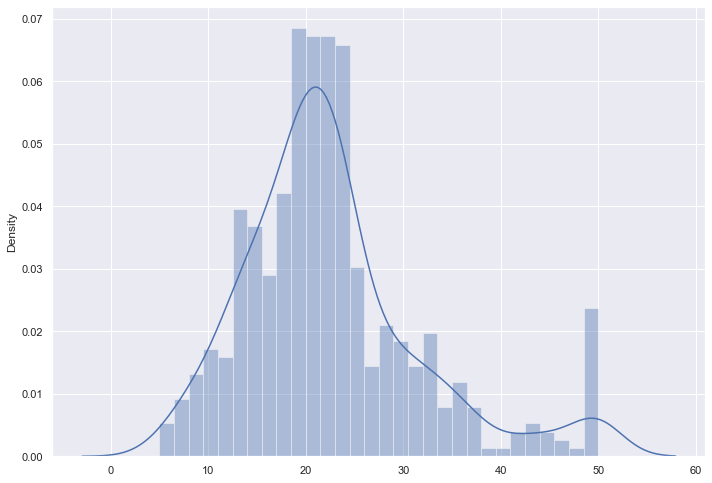

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(target, bins=30)
plt.show()

<AxesSubplot:>

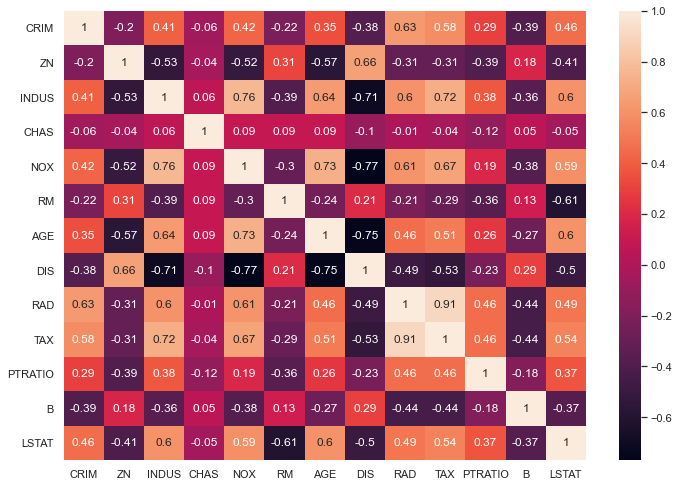

In [ ]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию.

In [ ]:
features = boston.columns
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

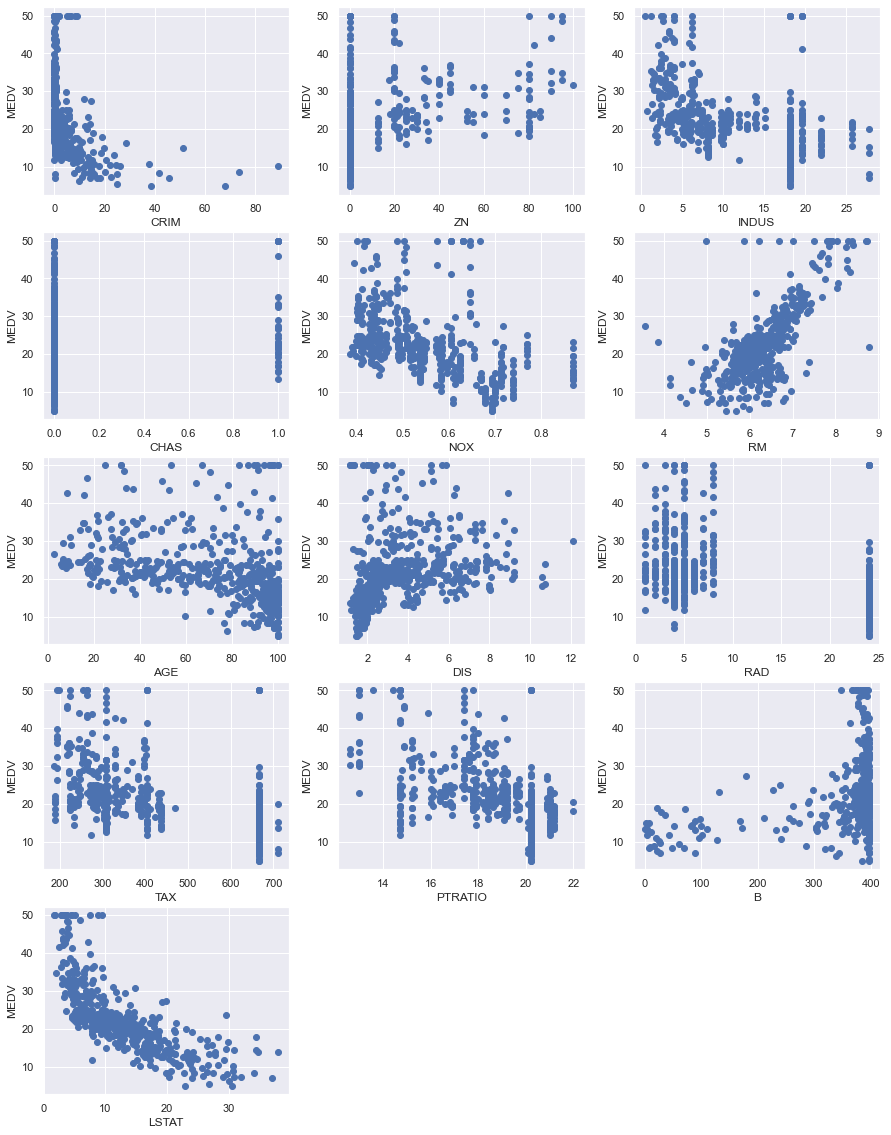

In [ ]:
plt.figure(figsize=(15, 20))

features = boston.keys()

for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Замечания:
- Цены растут по мере линейного увеличения стоимости RM. Существует несколько выбросов, и данные, похоже, ограничены 50.
- Цены имеют тенденцию к снижению с ростом LSTAT (не линейно).

In [ ]:
# # репрезентация данных в виде графиков
# g = sns.pairplot(boston)
# plt.show() # расскоментируйте, чтобы посмотреть

# <font color='blue'>Практическое задание</font>

1. Постройте нейронную сеть (берём простую линейную сеть, которую разбирали на уроке: меняем число слоёв, число нейронов, типы активации, тип оптимизатора) на датасете from sklern.datasets import load_boston.<br>

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшите её точность?


# Разделение данных на обучающие и тестовые наборы

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()
train_data = scaler_data.fit_transform(boston)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


train_data = pd.DataFrame(train_data, columns=boston_dataset["feature_names"])

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


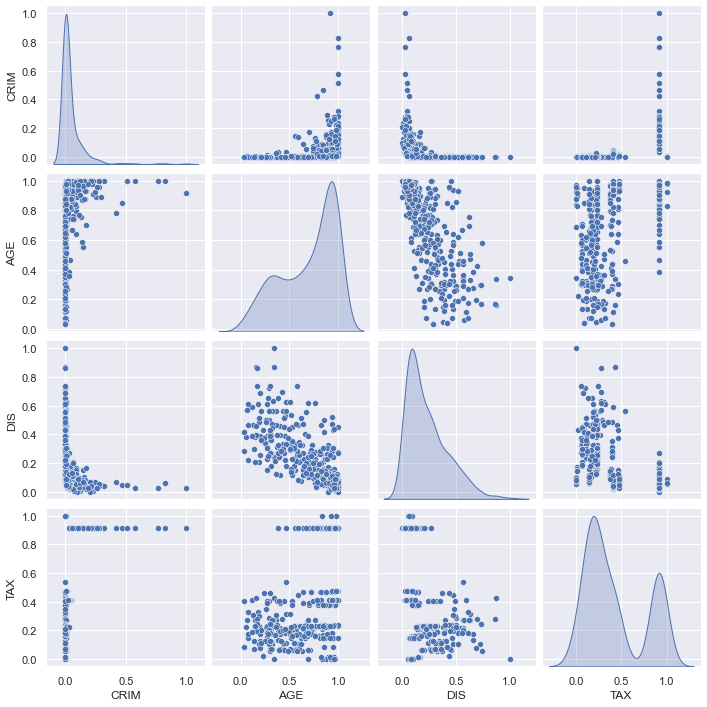

In [ ]:
sns.pairplot(X_train[["CRIM","AGE","DIS","TAX"]], diag_kind="kde")

In [ ]:
train_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# определим число нейронов скрытого слоя (ширина скрытого слоя)
neurons = [50, 100, 200]

# определим оптимизаторы
optimizers =  ['SGD','RMSProp','adam','NAdam']

# определим метрики
metrics = ['MSE', 'MAE']

In [ ]:
from sklearn.metrics import mean_squared_error

colNames = ["neurons", "epochs", "optimizer", "metric",
            "loss (train)", "metric_val (train)", "rmse (train)", "r2 (train)",
            "loss (test)", "metric_val (test)", "rmse (test)", "r2 (test)" ]

model_3_layers = pd.DataFrame(columns=colNames)

k = 1000  # количество эпох
for i in neurons:  # ширина скрытого слоя    
    for i_optim in optimizers:  # оптимизаторы 
        for k_metric in metrics:  # метрики
            x_input = keras.layers.Input( shape=(13))
            x = keras.layers.Dense(i, activation='relu')(x_input)
            x_output = keras.layers.Dense(1)(x)
            model = keras.models.Model(inputs=x_input, outputs=x_output)

            model.compile(
                optimizer=i_optim,
                loss='mae',
                metrics=[k_metric])

            model.fit(
                X_train,
                y_train,
                epochs=k,
                batch_size=100,
                # validation_split=0.2,  # использовать 20 % данных для валидации
                verbose=0
            )
            
            # model evaluation for training set
            loss_metric_train = model.evaluate(X_train, y_train)
            
            y_train_predict = model.predict(X_train)
            rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
            r2_train = r2_score(y_train, y_train_predict)

            # model evaluation for testing set
            loss_metric_test = model.evaluate(X_test, y_test)
            
            y_test_predict = model.predict(X_test)
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
            r2_test = r2_score(y_test, y_test_predict)
            
            model_3_layers = model_3_layers.append(pd.DataFrame({
                'neurons': [i],
#               'скорость обучения': [n],
                'epochs': [k],
                'optimizer': i_optim,
                'metric': k_metric,

                'loss (train)': [loss_metric_train[0]],
                'metric_val (train)': [loss_metric_train[1]],
                'rmse (train)': [rmse_train],
                'r2 (train)': [r2_train],

                'loss (test)': [loss_metric_test[0]],
                'metric_val (test)': [loss_metric_test[1]],
                'rmse (test)': [rmse_test],
                'r2 (test)': [r2_test]}),
                ignore_index=True)  

4/4 [==============================] - 0s 3ms/step - loss: 2.6949 - MAE: 2.6949


In [ ]:
model_3_layers.sort_values(by='r2 (test)', ascending=False)

,neurons,epochs,optimizer,metric,loss (train),metric_val (train),rmse (train),r2 (train),loss (test),metric_val (test),rmse (test),r2 (test)
20,200,1000,adam,MSE,2.033568,13.088802,3.617845,0.854712,2.532759,18.202017,4.266382,0.726369
18,200,1000,RMSProp,MSE,2.175313,14.330061,3.785507,0.840934,2.613506,19.041100,4.363611,0.713755
21,200,1000,adam,MAE,2.154835,2.154835,3.787960,0.840728,2.609661,2.609661,4.395317,0.709580
19,200,1000,RMSProp,MAE,2.283551,2.283551,3.950742,0.826745,2.645793,2.645793,4.484584,0.697664
10,100,1000,RMSProp,MSE,2.426916,16.639341,4.079135,0.815301,2.635586,20.248686,4.499854,0.695601
11,100,1000,RMSProp,MAE,2.420751,2.420751,4.046276,0.818264,2.683014,2.683014,4.507568,0.694557
2,50,1000,RMSProp,MSE,2.520309,17.334049,4.163418,0.807589,2.723081,20.585991,4.537179,0.690531
12,100,1000,adam,MSE,2.258771,15.623443,3.952650,0.826577,2.625455,20.743137,4.554463,0.688168
13,100,1000,adam,MAE,2.364052,2.364052,4.111797,0.812331,2.700979,2.700979,4.644477,0.675720
22,200,1000,NAdam,MSE,2.352403,16.765678,4.094592,0.813898,2.722205,21.767317,4.665545,0.672772


Лучшее значения на test-е при __количестве нейронов__=200, __количество слоёв__=3, __optimizer__='adam', __тип активации__='relu', __metric__='MSE' и составил  __r2__ =  0.726369.

- __train__: r2 = 0.854712
- __test__: r2 = 0.726369


Для train:
- loss = 2.033568	
- metrics values=13.088802	
- rmse = 3.617845
- r2 = 0.854712

Для test:
- loss=2.532759
- metrics values=18.202017	
- rmse = 4.266382
- r2 = 0.726369

Увеличим количество слоёв и проверим как изменился результат.

In [ ]:
model_n_layers = pd.DataFrame(columns=colNames)

k = 1000  # количество эпох
for i in neurons:  # ширина скрытого слоя    
    for i_optim in optimizers:  # оптимизаторы 
        for k_metric in metrics:  # метрики

            x_input = keras.layers.Input( shape=(13))
            x = keras.layers.Dense(i, activation='relu')(x_input)
            x_1 = keras.layers.Dense(i, activation='relu')(x)
            x_2 = keras.layers.Dense(i, activation='relu')(x_1)
            x_output = keras.layers.Dense(1)(x_2)
            model = keras.models.Model(inputs=x_input, outputs=x_output)

            model.compile(
                optimizer=i_optim,
                loss='mae',
                metrics=[k_metric])

            model.fit(
                X_train,
                y_train,
                epochs=k,
                batch_size=100,
                # validation_split=0.2,  # использовать 20 % данных для валидации
                verbose=0
            )
            
            # model evaluation for training set
            loss_metric_train = model.evaluate(X_train, y_train)
            
            y_train_predict = model.predict(X_train)
            rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
            r2_train = r2_score(y_train, y_train_predict)

            # model evaluation for testing set
            loss_metric_test = model.evaluate(X_test, y_test)
            
            y_test_predict = model.predict(X_test)
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
            r2_test = r2_score(y_test, y_test_predict)
            
            model_n_layers = model_3_layers.append(pd.DataFrame({
                'neurons': [i],
#               'скорость обучения': [n],
                'epochs': [k],
                'optimizer': i_optim,
                'metric': k_metric,

                'loss (train)': [loss_metric_train[0]],
                'metric_val (train)': [loss_metric_train[1]],
                'rmse (train)': [rmse_train],
                'r2 (train)': [r2_train],

                'loss (test)': [loss_metric_test[0]],
                'metric_val (test)': [loss_metric_test[1]],
                'rmse (test)': [rmse_test],
                'r2 (test)': [r2_test]}),
                ignore_index=True)

4/4 [==============================] - 0s 4ms/step - loss: 2.0603 - MAE: 2.0603


In [ ]:

model_n_layers.sort_values(by='r2 (test)', ascending=False)

,neurons,epochs,optimizer,metric,loss (train),metric_val (train),rmse (train),r2 (train),loss (test),metric_val (test),rmse (test),r2 (test)
24,200,1000,NAdam,MAE,0.875556,0.875556,1.325170,0.980507,2.060283,2.060283,3.186189,0.847388
20,200,1000,adam,MSE,2.033568,13.088802,3.617845,0.854712,2.532759,18.202017,4.266382,0.726369
18,200,1000,RMSProp,MSE,2.175313,14.330061,3.785507,0.840934,2.613506,19.041100,4.363611,0.713755
21,200,1000,adam,MAE,2.154835,2.154835,3.787960,0.840728,2.609661,2.609661,4.395317,0.709580
19,200,1000,RMSProp,MAE,2.283551,2.283551,3.950742,0.826745,2.645793,2.645793,4.484584,0.697664
10,100,1000,RMSProp,MSE,2.426916,16.639341,4.079135,0.815301,2.635586,20.248686,4.499854,0.695601
11,100,1000,RMSProp,MAE,2.420751,2.420751,4.046276,0.818264,2.683014,2.683014,4.507568,0.694557
2,50,1000,RMSProp,MSE,2.520309,17.334049,4.163418,0.807589,2.723081,20.585991,4.537179,0.690531
12,100,1000,adam,MSE,2.258771,15.623443,3.952650,0.826577,2.625455,20.743137,4.554463,0.688168
13,100,1000,adam,MAE,2.364052,2.364052,4.111797,0.812331,2.700979,2.700979,4.644477,0.675720


Лучшее значения на test-е при __количестве нейронов__=200, __количество слоёв__=5, __optimizer__='NAdam', __тип активации__='relu', __metric__='MAE' и составил  __r2__ =  0.847388.

- __train__: __r2__ = 0.980507	
- __test__: __r2__ = 0.847388

Для __train__:
- loss = 0.875556	
- metrics values=0.875556
- rmse = 1.325170	
- __r2__ = 0.980507	

Для __test__:
- loss=2.060283	
- metrics values=2.060283	
- rmse = 3.186189
- __r2__ = 0.847388

Результат улучшился:
- __test__: __r2__ = 0.847388 для __5 слоёв__, против __r2__ = 0.726369 для __3 слоёв__.
- __train__: __r2__ = 0.980507 для __5 слоёв__, против __r2__ = 0.854712 для __3 слоёв__.

Улучшить точность нейросети помогли следующие факторы:
- выбор подходящего оптимизатора,
- подбор оптимального количества нейронов,
- увеличение количества слоёв,
- r2 колебался от 0,64 до 0,86 (при неизменных параметрах).


# <font color='blue'>Практическое задание</font>

__3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).__

https://www.tensorflow.org/api_docs/python/tf


- tf.Graph(): A TensorFlow computation, represented as a dataflow graph.


- tf.size(): Returns the size of a tensor.


- tf.image - module contains various functions for image processing and decoding-encoding Ops.


    - resize(): Resize images to size using the specified method.

    - resize_with_pad(): Crops and/or pads an image to a target width and height.

    - convert_image_dtype(): Convert image to dtype, scaling its values if needed.


- tf.summary - Operations for writing summary data, for use in analysis and visualization.


    - audio(): Write an audio summary.
  
    - text(): Write a text summary.
    
    - image(): Write an image summary.
